# Ecommerce Text Classification - NLP

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("ecommerceDataset.csv",names = ["Class","Description"])
data.head()

,Class,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [3]:
data.shape

(50425, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        50425 non-null  object
 1   Description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [5]:
data.isna().sum()

Class          0
Description    1
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(50424, 2)

In [8]:
data.describe()

,Class,Description
count,50424,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [9]:
data.head()

,Class,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [10]:
data['Class'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

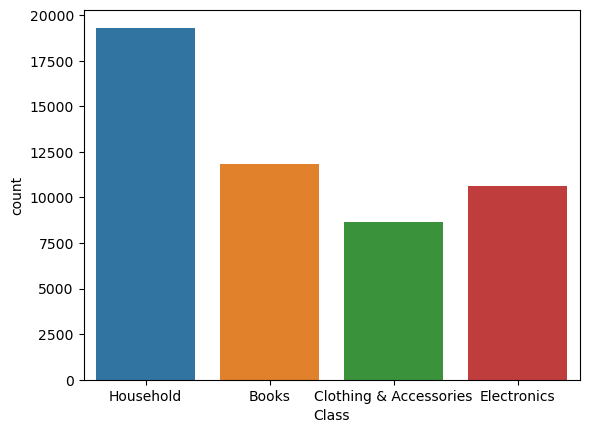

In [11]:
sns.countplot(data['Class'])

- since the number of data are different in different categories which result in Class Imbalance Problem.

- So, in order to deal with the class imbalance problem we may use different techniques like ReSample the training dataset(Over-Sampling & Under-Sampling) and Combination of Over and Under Sampling.


- Since here we are dealing with NLP problem where the data are sequential like text so we can use the **Google Translation(google trans python package):**

This is one of the useful techniques to expand the count of minority groups. Here, we translate the given sentence to ‘non-English’ language and then again translating to ‘English’. In this way, the significant details of the input message are maintained but the order of words / sometimes new words with similar meaning are introduced as a new record and thus boosting the count of insufficient class.



## Text Preprocessing 

In [13]:
import nltk

- **Lower Casing**

In [14]:
data["Description"] = data["Description"].str.lower()
data.head()

,Class,Description
0,Household,paper plane design framed wall hanging motivat...
1,Household,"saf 'floral' framed painting (wood, 30 inch x ..."
2,Household,saf 'uv textured modern art print framed' pain...
3,Household,"saf flower print framed painting (synthetic, 1..."
4,Household,incredible gifts india wooden happy birthday u...


In [15]:
data['Description'][1]

"saf 'floral' framed painting (wood, 30 inch x 10 inch, special effect uv print textured, sao297) painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. this is an special series of paintings which makes your wall very beautiful and gives a royal touch (a perfect gift for your special ones)."

- **Removal of Punctuations**

In [16]:
#function to remove the punctuation
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data["Description"] = data["Description"].apply(lambda text: remove_punctuation(text))
data.head()

,Class,Description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


In [17]:
data['Description'][1]

'saf floral framed painting wood 30 inch x 10 inch special effect uv print textured sao297 painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it this is an special series of paintings which makes your wall very beautiful and gives a royal touch a perfect gift for your special ones'

- **Removing stopwords**

In [18]:
import string
from nltk.corpus import stopwords

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])


In [19]:
data['Description']=data['Description'].apply(process_text)

In [20]:
data['Description'][1]

'saf floral framed painting wood 30 inch x 10 inch special effect uv print textured sao297 painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch perfect gift special ones'

- **Stemming**

In [21]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

data['Description']=data['Description'].apply(stemming)
data.head()    

,Class,Description
0,Household,paper plane design framed wall hanging motivat...
1,Household,saf floral framed painting wood 30 inch x 10 i...
2,Household,saf uv textured modern art print framed painti...
3,Household,saf flower print framed painting synthetic 135...
4,Household,incredible gifts india wooden happy birthday u...


In [22]:
data['Description']

0        paper plane design framed wall hanging motivat...
1        saf floral framed painting wood 30 inch x 10 i...
2        saf uv textured modern art print framed painti...
3        saf flower print framed painting synthetic 135...
4        incredible gifts india wooden happy birthday u...
                               ...                        
50420    strontium microsd class 10 8gb memory card bla...
50421    crossbeats wave waterproof bluetooth wireless ...
50422    karbonn titanium wind w4 white karbonn titaniu...
50423    samsung guru fm plus smb110ed black colourblac...
50424                       micromax canvas win w121 white
Name: Description, Length: 50424, dtype: object

In [23]:
data['Description'][3]

'saf flower print framed painting synthetic 135 inch x 22 inch uv textured set 3 sanfsw4951 colormulticolor size35 cm x 50 cm x 2 cm beautiful painting involves action skill using paint right manner hence end product picture speak thousand words say arts trend quite time give different viewer different meanings style design saf wood matte painting frame quite abstract mysteriously beautiful painting nice frame gift family friend painting various forms certain figures seen image add good set lights place painting decor give different feel look place quality durability painting matte finish includes good quality frame last long period however include glass along frame'

- **Creating the Bag of Words model**

In [24]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(data['Description'])


In [25]:
X.shape

(50424, 5000)

In [26]:
y = data['Class']

- **Splitting the data into test and training data**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [28]:
cv.get_feature_names()[150:300]

['able',
 'abs',
 'abs plastic',
 'absolute',
 'absolutely',
 'absorb',
 'absorbent',
 'absorbing',
 'absorbs',
 'ac',
 'academic',
 'academy',
 'accent',
 'access',
 'accessible',
 'accessories',
 'accessory',
 'acclaimed',
 'accommodate',
 'according',
 'account',
 'accounting',
 'accuracy',
 'accurate',
 'accurate content',
 'accurate content books',
 'acer',
 'achieve',
 'achievement',
 'across',
 'acrylic',
 'act',
 'action',
 'action camera',
 'activated',
 'active',
 'activities',
 'activity',
 'acts',
 'actual',
 'actual item',
 'actual product',
 'actual product may',
 'actually',
 'adapter',
 'adapter cable',
 'adaptor',
 'add',
 'add touch',
 'added',
 'adding',
 'addition',
 'additional',
 'additional features',
 'additionally',
 'address',
 'adds',
 'adhesive',
 'adjust',
 'adjustable',
 'adjusted',
 'adjusting',
 'adjustment',
 'administration',
 'adopted',
 'adopted whole',
 'adopted whole new',
 'adorable',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'a

In [29]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

## MultinomialNB Algorithm

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [31]:
y_pred = nb.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

                 Books       0.97      0.89      0.93      3869
Clothing & Accessories       0.93      0.98      0.95      2892
           Electronics       0.91      0.92      0.92      3482
             Household       0.92      0.94      0.93      6397

              accuracy                           0.93     16640
             macro avg       0.93      0.93      0.93     16640
          weighted avg       0.93      0.93      0.93     16640



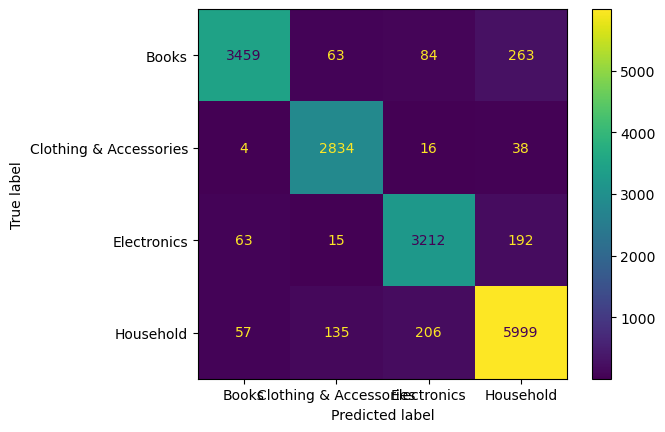

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)


## SVM

In [34]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced')
svm.fit(X_train,y_train)


SVC(class_weight='balanced')

In [35]:
y_pred = svm.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

                 Books       0.90      0.96      0.93      3869
Clothing & Accessories       0.97      0.96      0.97      2892
           Electronics       0.95      0.94      0.95      3482
             Household       0.96      0.93      0.95      6397

              accuracy                           0.95     16640
             macro avg       0.95      0.95      0.95     16640
          weighted avg       0.95      0.95      0.95     16640



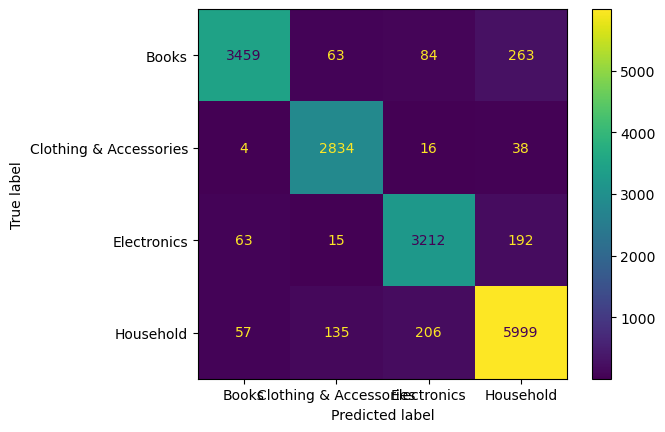

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

- Here, the accuracy is 95% which is better than the multinomial naive bayes model.